**Problem Statement**

Xulu as a company wants to know:

Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

How well those variables describe the electric cycle demands


In [2]:
#importing all the necessary python libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import binom,geom,norm,ttest_1samp,ttest_ind,poisson,expon
from scipy.stats import chisquare,chi2_contingency,f_oneway,kruskal,shapiro,levene
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import spearmanr,pearsonr

In [4]:
df=pd.read_csv('bike_sharing.csv')
df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
print(f'Count of records in dataset is {df.shape[0]} and number of columns are {df.shape[1]}.')

Count of records in dataset is 10886 and number of columns are 12.


In [6]:
#Converting the datatype of required columns
#datetime --> datetime datatype
#category cols like season,holiday,workingday,weather --> object datatype
df['datetime']=pd.to_datetime(df['datetime'])

cat_cols=['season', 'holiday', 'workingday', 'weather']
df[cat_cols]=df[cat_cols].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [7]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**causal & registered columns might contain outliers since it 50% is different from the mean, where outliers affected the mean**

In [8]:
df.describe(include='object')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


**season: season (1: spring, 2: summer, 3: fall, 4: winter)**

**holiday: 1- Holiday 0- not a holiday**

**workingday: if day is neither weekend nor holiday is 1, otherwise is 0.**

**weather:**

**1: Clear, Few clouds, partly cloudy, partly cloudy**

**2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist**

**3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds**

**4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog**


In [9]:
df.isna().sum() #Checking null values

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

**No missing values present in the data**

In [10]:
print(df['casual'].sum())
print(df['registered'].sum())
print(df['count'].sum())

392135
1693341
2085476


The total number of casual users are 392135

The total number of registered users are 1693341

The total number of users who used xulu bike are 2085476

In [11]:
print(df.groupby('season')['count'].sum())

season
1    312498
2    588282
3    640662
4    544034
Name: count, dtype: int64


season: season (1: spring, 2: summer, 3: fall, 4: winter)

***High demand for the electric cycles is in the season of 3.Fall***

In [12]:
print(df.groupby('holiday')['count'].sum())

holiday
0    2027668
1      57808
Name: count, dtype: int64


**Since holidays are less we can see less number of vechiles compared to non holidays vechile count**

In [13]:
print(df.groupby('workingday')['count'].sum())

workingday
0     654872
1    1430604
Name: count, dtype: int64


In [14]:
print(df.groupby('weather')['count'].sum())

weather
1    1476063
2     507160
3     102089
4        164
Name: count, dtype: int64


 weather:

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


***From above data its clearly visible that demand for electric vechiles is high if the weather is clear and least demand when weather is not good i.e 4***

In [15]:
df['datetime'].min(),df['datetime'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

Date range of electric cycles rented is from 2011-01-01 to 2012-12-19

In [27]:
df[cat_cols].melt().groupby(['variable','value'])[['value']].count()/df.shape[0]*100

value
variable   value           
holiday    0      97.143120
           1       2.856880
season     1      24.673893
           2      25.105640
           3      25.105640
           4      25.114826
weather    1      66.066507
           2      26.033437
           3       7.890869
           4       0.009186
workingday 0      31.912548
           1      68.087452

# Univariate Analysis 

In [32]:
cat_cols=['season', 'holiday', 'workingday', 'weather']
num_cols=['temp','atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

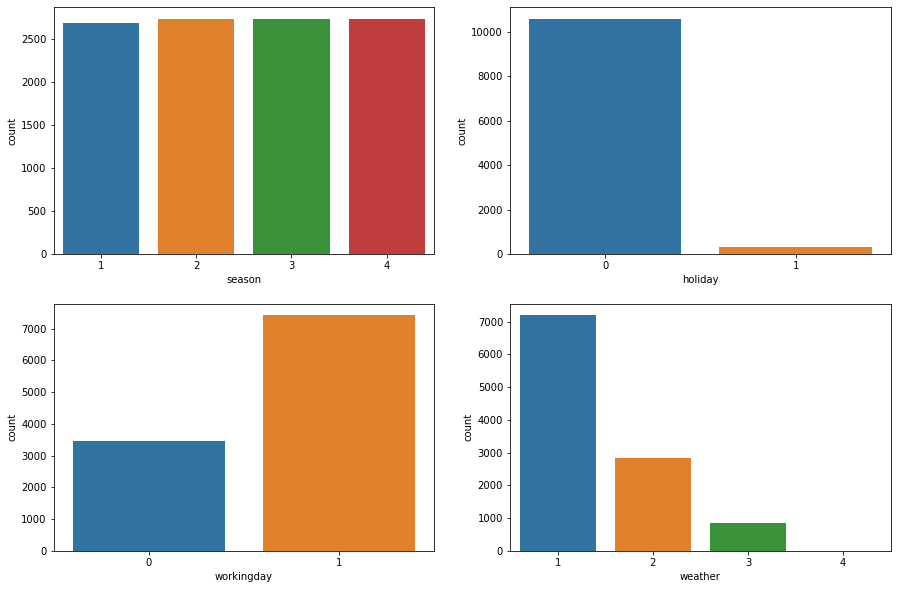

In [37]:
#countplot to check the distribution of data for categorical columns

fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
index=0
for i in range(2):
    for j in range(2):
        sns.countplot(data=df,x=cat_cols[index],ax=ax[i,j])
        index+=1
plt.show()

From the above countplot visuals, its clearly visible that demand of bike rent is similar to same with respect to the sesons.

As know there is nothing new with the working days being more and holidays, non working days are less which is justified by the countplot.

***Its clearly visible from the weather countplot the demand for cycles is more when the weather is clear,Few clouds, partly cloudy, partly cloudy***

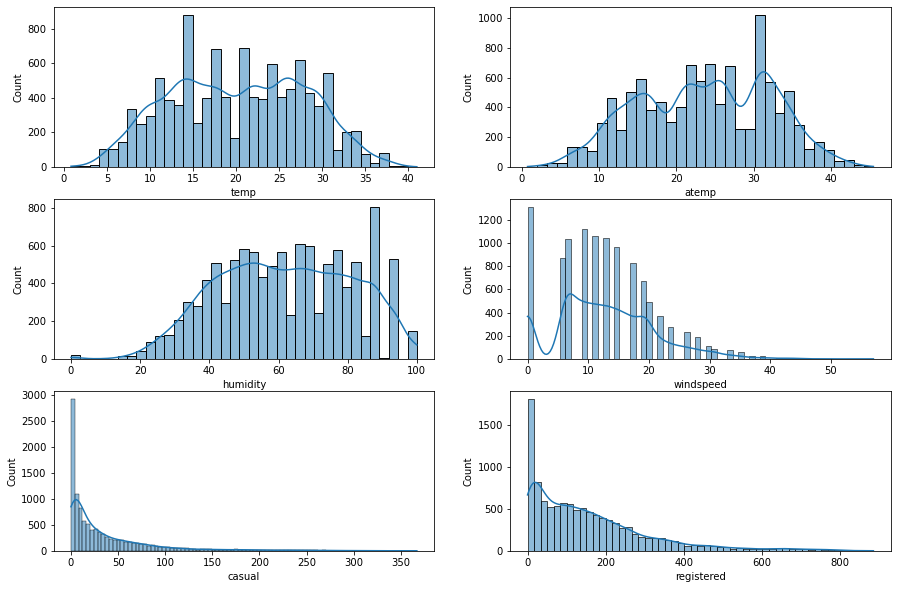

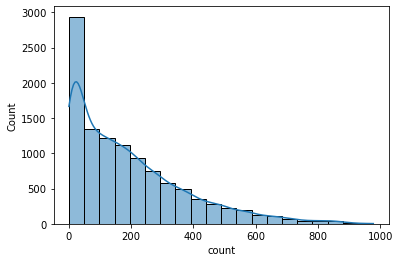

In [50]:
#histplot to check the distribution of data for numerical columns

fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(15,10))
index=0
for i in range(3):
    for j in range(2):
        sns.histplot(data=df,x=num_cols[index],ax=ax[i,j],kde=True)
        index+=1
plt.show()

sns.histplot(data=df,x=num_cols[-1],kde=True,bins=20)
plt.show()



'temp','atemp', 'humidity' looks like they are following normal distribution.

'windspeed' follows binomial distribution.

casual', 'registered', 'count' are right skewed when apply log to these it turns to normal distribution. So, we can infer these columns follows log normal distribution.


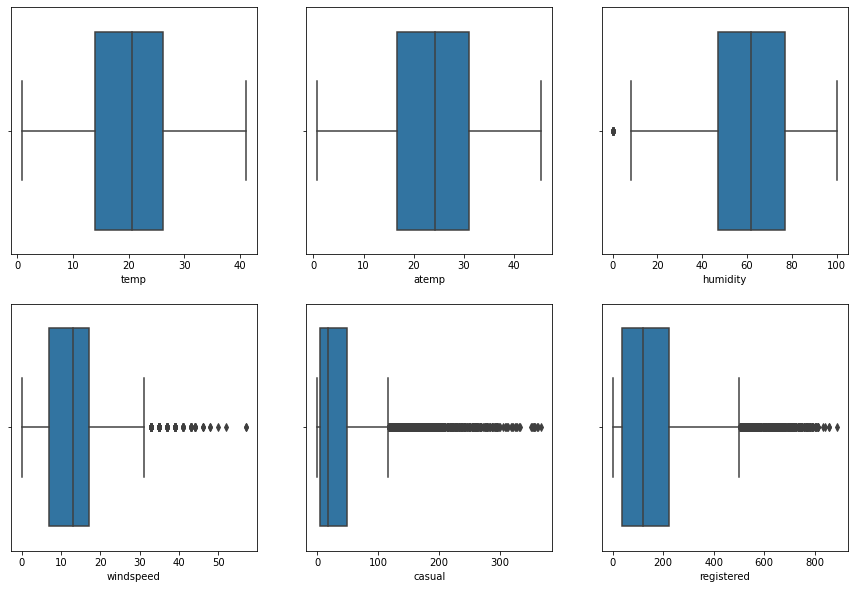

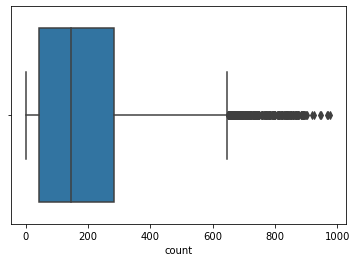

In [47]:
#boxplot to check outliers for numerical columns

fig,ax=plt.subplots(nrows=2,ncols=3,figsize=(15,10))
index=0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df,x=num_cols[index],ax=ax[i,j])
        index+=1
plt.show()

sns.boxplot(data=df,x=num_cols[-1])
plt.show()

**From the above boxplots, we can see that outliers are present majorly for these features 'windspeed', 'causal', 'registered','count'.**

# Bivariate Analysis

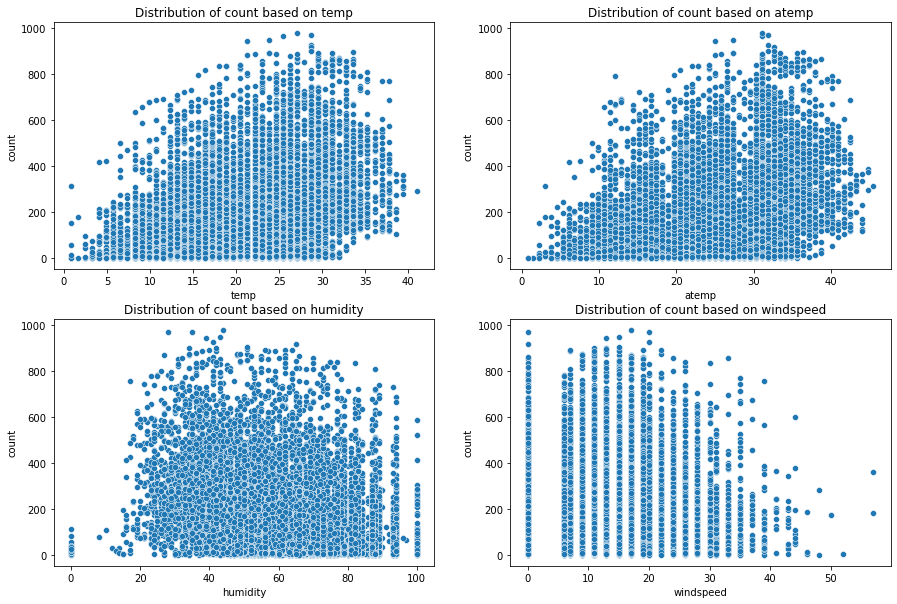

In [63]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
index = 0

for i in range(2):
    for j in range(2):
        sns.scatterplot(data=df, x=num_cols[index], y='count', ax=ax[i, j])
        ax[i,j].set_title(f'Distribution of count based on {num_cols[index]}')
        index += 1
plt.show()

Observations:
    
    If temperature is less than 10 and greater than 35 there is less demand for Yulu cycles. As people don't want to come out on two wheeler.
    
    People prefer Yulu cycles when humidity is greater 20.
    
    When there is more windspeed i.e >40 demand is very low as people don't want to ride cycles when they're heavy winds.  

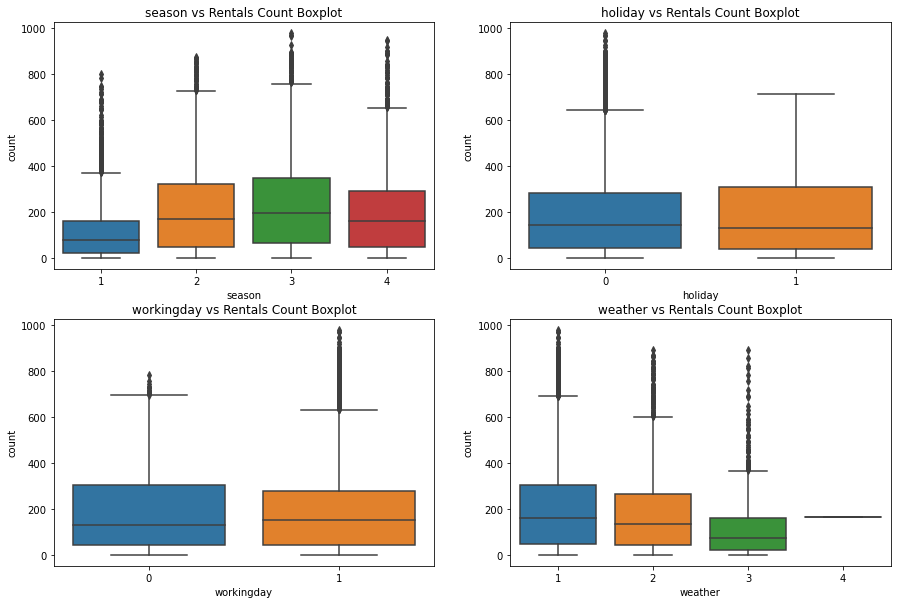

In [61]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
index = 0

for i in range(2):
    for j in range(2):
        sns.boxplot(data=df, x=cat_cols[index], y='count', ax=ax[i, j])
        ax[i,j].set_title(f'{cat_cols[index]} vs Rentals Count Boxplot')
        index += 1
plt.show()

Observations:
    
    People like to come out more at the times of fall,summer season which is understood by the boxplot as we can see the IQR range is more and outliers are also present.
    
    Suprisingly there are no outliers when its holiday as there few holidays most of the people come out to spend time which is why we see more demand of renting cycles. Non working days also follow the same scenario as Holidays.
    
    When weather is Clear, Few clouds, partly cloudy, partly cloudy the demand for rental electric cycles is more, as the weather worsens the demand decreases which is clearly shown in the weather boxplot.
    
    

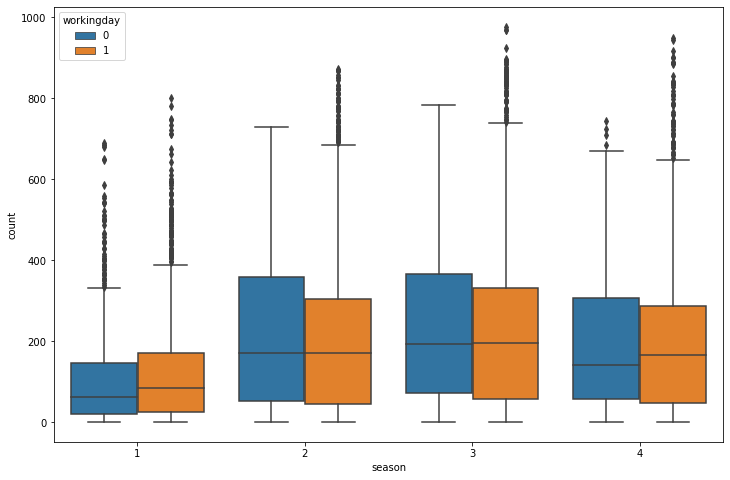

In [79]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='season',y='count',hue='workingday')
plt.show()

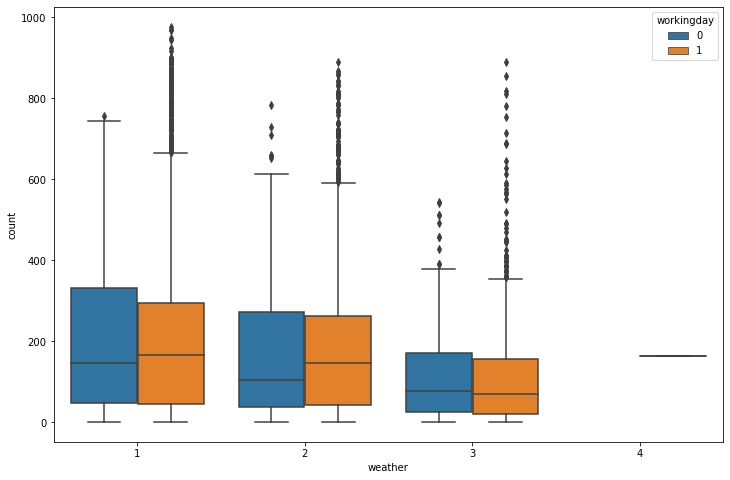

In [78]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='weather',y='count',hue='workingday')
plt.show()

In the seasons of fall and summer when weather is clear there is demand for electric cycles on working days.

# Multivariate Analysis

In [70]:
df.corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


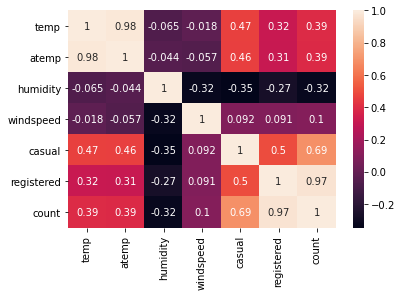

In [73]:
sns.heatmap(df.corr(),annot=True)
plt.show()

**Very High correlation present between temp and atemp**

**Select an appropriate test to check whether:**

    Working Day has effect on number of electric cycles rented
    
    No. of cycles rented similar or different in different seasons
    
    No. of cycles rented similar or different in different weather
    
    Weather is dependent on season (check between 2 predictor variable)

# Testing whether Working Day has effect on number of electric cycles rented or Not

**step-1: Setting up the null and alternate hypothesis**

Null Hypothesis (Ho): Working Day does not effect on number of electric cycles rented

Alternate Hypothesis (Ha): Working Day has effect on number of electric cycles rented

**step-2: checking the distribution and assumptions of the null hypothesis through visual and tests**

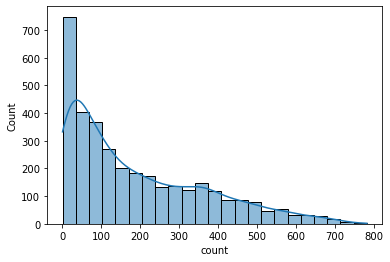

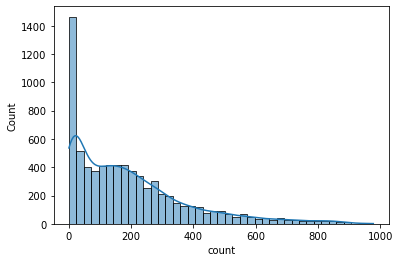

In [109]:
sns.histplot(data=df[df['workingday']==0],x='count',kde=True)
plt.show()

sns.histplot(data=df[df['workingday']==1],x='count',kde=True)
plt.show()

**The visual graph shows that workingday data doesn't follow normal distribution. This can be checked with the help of QQ plot and also the shapiro, levene test**

In [110]:
from statsmodels.graphics.gofplots import qqplot

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

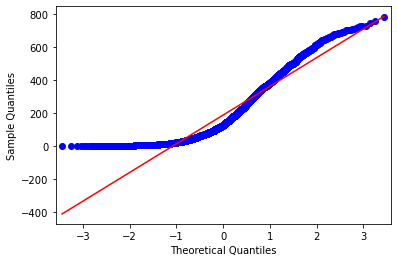

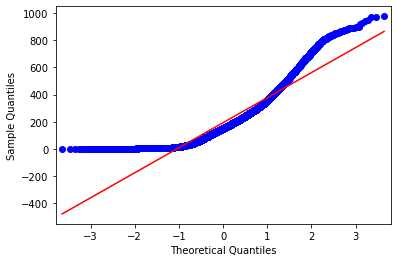

In [114]:
qqplot(df[df['workingday']==0]['count'],line='s')
plt.show()

qqplot(df[df['workingday']==1]['count'],line='s')
plt.show()

In [115]:
#QQ plot proves that the data doesn't follow quassian distribution, let's also check it statiscally with the help of shapiro test
#H0 : Data is Gaussian
#Ha : Data is not Gaussian

shapiro(df[df['workingday']==0]['count'].sample(200))

ShapiroResult(statistic=0.885104238986969, pvalue=3.12185832740397e-11)

In [116]:
shapiro(df[df['workingday']==1]['count'].sample(200))

ShapiroResult(statistic=0.8461805582046509, pvalue=2.8168396434824494e-13)

***P value is very small (<0.05) for both distributions when used shapiro test. So we reject the Ho and The Data is not guassian.***

In [121]:
#3rd Assumption is Levene test, to check the variance is equally distributed
#In statistics, Levene's test is an inferential statistic used to assess the equality of variances for a variable calculated for two or more groups
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(df[df['workingday']==0]['count'], df[df['workingday']==1]['count'])
if p_value < 0.05:
    print("Variances are not equal")
else:
    print('Variances are equal')

Variances are equal


***We observed variances are equal for both working day and non working day but QQ plot and levene test got failed. Even though the normality got failed lets go with the analysis.***

**step-3: Choosing the right test statistic**

**step-4: Compute the p-value**
    
**step-5: Compare p-value with significance level to infer the hypothesis**

In [123]:
#2-sample t-test gives can be used to check the independence between the two features. 
#Even though normality failed we are continuing with ttest_ind

t_statistic,p_value=ttest_ind(df[df['workingday']==0]['count'], df[df['workingday']==1]['count'])
print(t_statistic,p_value)
if p_value < 0.05:
    print("Reject the Ho")
else:
    print('Fail to reject Ho, accept the Ho')

-1.2096277376026694 0.22644804226361348
Fail to reject Ho, accept the Ho


Conclusion: ***Therefore, we can statistically infer that Working Day has no effect on number of electric cycles rented. No of cycles rented on working days and non working days is similar.***

# Testing whether No. of cycles rented is similar or different in different weather 

In [130]:
w1=df[df['weather']==1]['count']  # Creating series of groups based on weather
w2=df[df['weather']==2]['count']
w3=df[df['weather']==3]['count']
w4=df[df['weather']==4]['count']

step-1: Setting up the null and alternate hypothesis

**Null Hypothesis (Ho): No. of cycles rented is similar in different weather**

**Alternate Hypothesis (Ha): No. of cycles rented is different in different weather**

step-2: checking the distribution and assumptions of the null hypothesis through visual and tests
    
step-3: Choosing the correct test statistic

step-4: Compute the p-value

step-5: Compare p-value with significance level to infer the hypothesis

In [132]:
#We will be following the same methods which we did earlier in the above tests for working day

In [137]:
w4.count() #Weather 4 has only 1 datapoint which is not suitable to consider, so we check for the remaining three groups

1

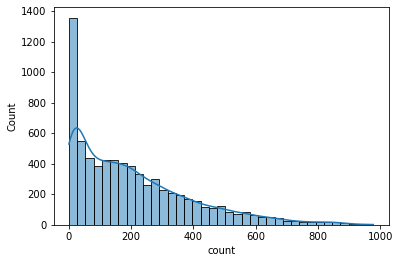

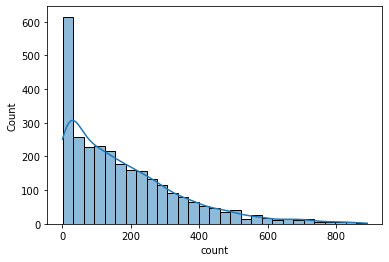

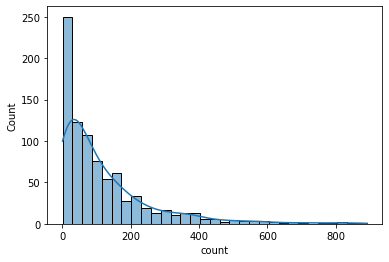

In [151]:
sns.histplot(data=w1,kde=True)
plt.show()

sns.histplot(data=w2,kde=True)
plt.show()

sns.histplot(data=w3,kde=True)
plt.show()

The visual graph shows that weather count data doesn't follow normal distribution. This can be checked with the help of QQ plot and also the shapiro, levene test

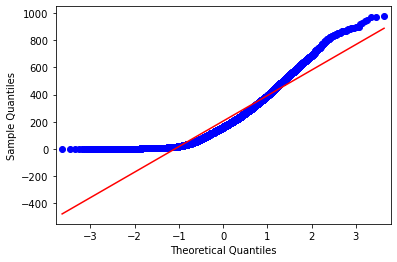

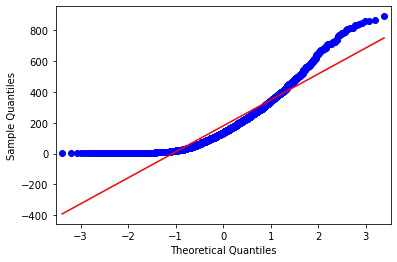

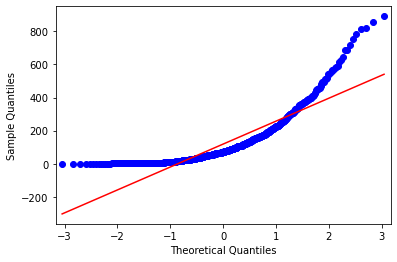

In [152]:
qqplot(w1,line='s')
plt.show()

qqplot(w2,line='s')
plt.show()

qqplot(w3,line='s')
plt.show()

In [173]:
#QQ plot proves that the weather data doesn't follow guassian distribution, let's also check it statiscally with the help of shapiro test
#H0 : Data is Gaussian
#Ha : Data is not Gaussian

print(shapiro(w1.sample(200)))
print(shapiro(w2.sample(200)))
print(shapiro(w3.sample(200)))

ShapiroResult(statistic=0.889133870601654, pvalue=5.388198914824116e-11)
ShapiroResult(statistic=0.865402102470398, pvalue=2.5650124385601103e-12)
ShapiroResult(statistic=0.8123223781585693, pvalue=8.816167095676303e-15)


**P value is very small (<0.05) for three group distributions when used shapiro test. So we reject the Ho and The Data is not guassian.**

In [154]:
#3rd Assumption is Levene test, to check the variance is equally distributed for 3 groups
#In statistics, Levene's test is an inferential statistic used to assess the equality of variances for a variable calculated for two or more groups
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(w1,w2,w3)
if p_value < 0.05:
    print("Variances are not equal")
else:
    print('Variances are equal')

Variances are not equal


In [155]:
#Here variance of three groups is not equal
#Even though the normality got failed for all the tests lets go with the analysis.

For independent variable of K groups, f_oneway test determines whether the means of the groups is significantly same or different.

Since variances are not same for the 3 groups and doesn't follow the normal distribution generally f oneway test is not suitable. We should go with the Kruskal Wallis test which is its equivalent when Anova conditions fails.

But here we will do both the tests.

In [157]:
#F_oneway
f_value,p_value=f_oneway(w1,w2,w3)
print(f_value,p_value)
if p_value<0.05:
    print('reject Ho')
else:
    print('fail to reject Ho')

98.28356881946706 4.976448509904196e-43
reject Ho


In [160]:
#Kruskal Wallis test
k_value,p_value=kruskal(w1,w2,w3)
print(k_value,p_value)
if p_value<0.05:
    print('reject Ho')
else:
    print('fail to reject Ho')

204.95566833068537 3.122066178659941e-45
reject Ho


Conclusion: ***Therefore, we can statistically infer from both Kruskal & Annova test that No. of cycles rented is different in different weather. Weather is dependent factor for the people to rent the electric cycle***

# Testing whether No. of cycles rented is similar or different in different Seasons

In [165]:
df['season'].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [166]:
s1=df[df['season']==1]['count']  # Creating series of groups based on seasons
s2=df[df['season']==2]['count']
s3=df[df['season']==3]['count']
s4=df[df['season']==4]['count']

step-1: Setting up the null and alternate hypothesis

**Null Hypothesis (Ho): No. of cycles rented is similar in different seasons**

**Alternate Hypothesis (Ha): No. of cycles rented is different in different seasons**

step-2: checking the distribution and assumptions of the null hypothesis through visual and statistic tests
    
step-3: Choosing the correct test statistic

step-4: Compute the p-value

step-5: Compare p-value with 95% significance level to infer the hypothesis

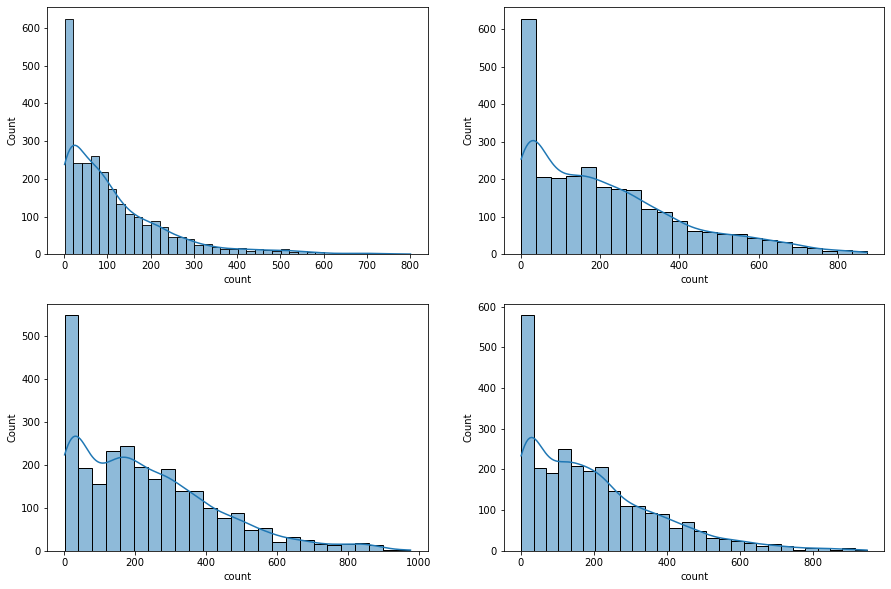

In [171]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
s=[s1,s2,s3,s4]
index=0
for i in range(2):
    for j in range(2):
        sns.histplot(data=s[index],kde=True,ax=ax[i,j])
        index+=1
plt.show()

The visual graph shows that weather count data doesn't follow normal distribution. This can be checked with the help of QQ plot and also the shapiro, levene test

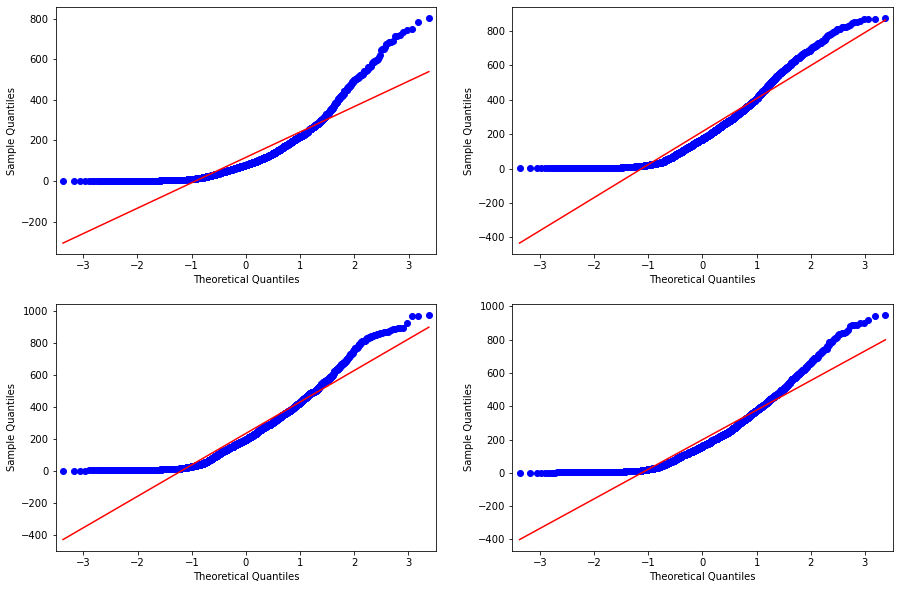

In [172]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
s=[s1,s2,s3,s4]
index=0
for i in range(2):
    for j in range(2):
        qqplot(s[index],line='s',ax=ax[i,j])
        index+=1
plt.show()

In [174]:
#QQ plot proves that the seasons count data doesn't follow guassian distribution, let's also check it statiscally with the help of shapiro test
#H0 : Data is Gaussian
#Ha : Data is not Gaussian

print(shapiro(s1.sample(200)))
print(shapiro(s2.sample(200)))
print(shapiro(s3.sample(200)))
print(shapiro(s4.sample(200)))

ShapiroResult(statistic=0.8331522345542908, pvalue=7.010457345928492e-14)
ShapiroResult(statistic=0.9001878499984741, pvalue=2.5830776406721156e-10)
ShapiroResult(statistic=0.9067049026489258, pvalue=6.864980806042809e-10)
ShapiroResult(statistic=0.8755580186843872, pvalue=8.997848473246695e-12)


**P value is very small (<0.05) for 4 group season distributions when used shapiro test. So we reject the Ho and The Data is not guassian.**

In [175]:
#3rd Assumption is Levene test, to check the variance is equally distributed for 4 groups
#In statistics, Levene's test is an inferential statistic used to assess the equality of variances for a variable calculated for two or more groups
# H0: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(s1,s2,s3,s4)
if p_value < 0.05:
    print("Variances are not equal")
else:
    print('Variances are equal')

Variances are not equal


In [177]:
#Here variance of three groups is not equal
#Even though the normality got failed for all the tests lets go with the analysis for the 4 season groups

For independent variable of K groups, f_oneway which is annova test determines whether the means of the groups is significantly same or different.

Since variances are not same for the 4 groups and doesn't follow the normal distribution generally f oneway test is not suitable. We should go with the Kruskal Wallis test which is its equivalent when Anova conditions fails.

But here we will do both the tests.

In [178]:
#F_oneway
f_value,p_value=f_oneway(s1,s2,s3,s4)
print(f_value,p_value)
if p_value<0.05:
    print('reject Ho')
else:
    print('fail to reject Ho')

236.94671081032106 6.164843386499654e-149
reject Ho


In [179]:
#Kruskal Wallis test
k_value,p_value=kruskal(s1,s2,s3,s4)
print(k_value,p_value)
if p_value<0.05:
    print('reject Ho')
else:
    print('fail to reject Ho')

699.6668548181988 2.479008372608633e-151
reject Ho


Conclusion: ***Therefore, we can statistically infer from both Kruskal & Annova test that No. of cycles rented is different in different seasons. Season is dependent factor for the people to rent the electric cycle***

# Test to check whether if Weather is dependent on the season or Not

In [189]:
df[['weather','season']].describe()

,weather,season
count,10886,10886
unique,4,4
top,1,4
freq,7192,2734


We can see that both the weather, season are categorical variables. The dependence can be checked with the help of chisquaed test

In [5]:
t1=pd.crosstab(index=df['season'],columns=df['weather']).replace(np.nan,0)
t1

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


we cannot perform chisquared test if any of the element in the matrix is less than 5. Here the weather 4 has only one value, we need to eliminate it

In [6]:
t1=pd.crosstab(index=df['season'],columns=df['weather']).replace(np.nan,0)
t2=t1.to_numpy()[:,:3]
t2

array([[1759,  715,  211],
       [1801,  708,  224],
       [1930,  604,  199],
       [1702,  807,  225]], dtype=int64)

step-1: Setting up the null and alternate hypothesis

Null Hypothesis (Ho): Weather is not dependent on the season

Alternate Hypothesis (Ha): Weather is dependent on the season

step-2: checking the distribution and assumptions of the null hypothesis through visual and statistic tests

step-3: Choosing the correct test statistic

step-4: Compute the p-value

step-5: Compare p-value with 95% significance level to infer the hypothesis

In [7]:
chi_test, p_value,dof,expected=chi2_contingency(t2)
print(chi_test,p_value)
print(expected)
if p_value<0.05:
    print('reject Ho')
else:
    print('fail to reject Ho')

46.10145731073249 2.8260014509929343e-08
[[1774.04869086  699.06201194  211.8892972 ]
 [1805.76352779  711.55920992  215.67726229]
 [1805.76352779  711.55920992  215.67726229]
 [1806.42425356  711.81956821  215.75617823]]
reject Ho


Conclusion: ***Therefore, we can statistically infer from chisquare test that weather is dependent on the season. As the season changes weather varies with the demand in the electric bikes also changes.***

In [ ]:
#Checking correlations

[]

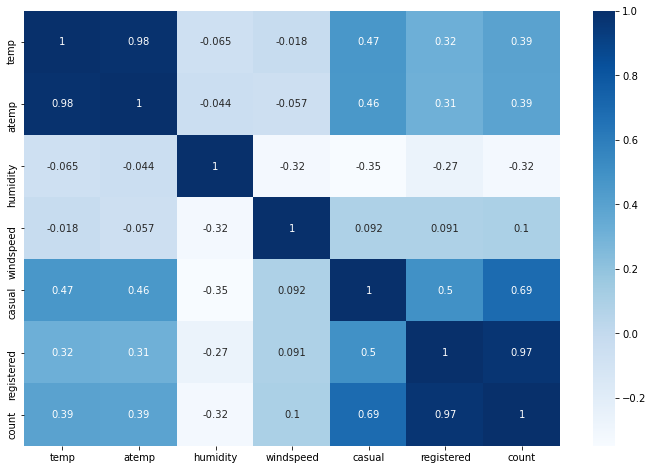

In [216]:
plt.figure(figsize = (12, 8))
sns.heatmap(data = df.corr(), cmap = 'Blues', annot = True)
plt.plot()

Coorelation between temp and atemp is very high.

Correlation between the casual,registered,count is moderate and noticeble.

Also we can see based on the temp there is significant correlation with casual,registered,count

In [219]:
#All the insights are given below the each cells.

Some Recommendations

Weather plays important role, so yulu should be aware of the weather and maintain their inventory, app maintaience.
   
During working days and non peak hours yulu can run some offers to attract people to take rents.

Marketing should be done effectively based on the seasons.

Monthly, weekly offers to be maintained to attract more customers.